In [48]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
import matplotlib.pyplot as plt

In [49]:
# -----------------------------
# 2. Data Preprocessing
# -----------------------------
data = """The speed of transmission is an important point of difference between the two viruses. 
Influenza has a shorter median incubation period the time from infection to appearance of symptoms 
and a shorter serial interval the time between successive cases than COVID 19 virus. 
The serial interval for COVID 19 virus is estimated to be 5 6 days while for influenza virus  
the serial interval is 3 days. This means that influenza can spread faster than COVID-19."""

sentences = data.lower().split('.')
# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

vocab_size = len(tokenizer.word_index) + 1
word_to_index = tokenizer.word_index
index_to_word = {v: k for k, v in word_to_index.items()}

In [50]:
# -----------------------------
# 3. Create Training Data (Context → Target)
# -----------------------------
context_size = 2
contexts, targets = [], []

for seq in sequences:
    for i in range(context_size, len(seq) - context_size):
        target = seq[i]
        context = [seq[i - 2], seq[i - 1], seq[i + 1], seq[i + 2]]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
Y = np.array(targets)

In [51]:
# -----------------------------
# 4. Build Model
# -----------------------------
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=20, input_length=4),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
# -----------------------------
# 5. Train Model
# -----------------------------
history = model.fit(X, Y, epochs=100, verbose=0)

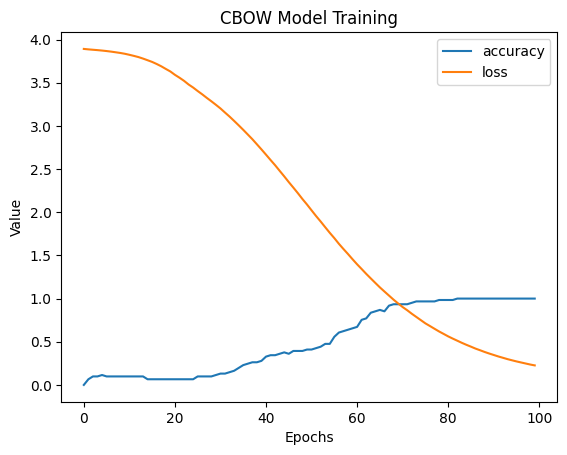


Word Embeddings:

[[-4.18156274e-02  1.09822378e-02  3.76994945e-02 -4.79061604e-02
  -3.58214267e-02 -1.24474168e-02  1.28822438e-02 -1.12788305e-02
   1.04679950e-02  1.25269182e-02 -1.13295391e-03  2.24670209e-02
  -3.84588353e-02  2.84547545e-02  1.62467472e-02 -8.39062780e-03
   8.07666779e-03 -4.50937152e-02 -1.81359425e-02  6.63843006e-03]
 [ 8.78790766e-03 -1.61152691e-01 -2.82984138e-01 -4.12921309e-01
   1.65873155e-01  1.90041274e-01  2.64273316e-01 -1.43267736e-01
   3.43753308e-01  3.51497710e-01 -3.33358079e-01 -1.54339269e-01
   4.91011888e-02 -1.02982678e-01  1.21562488e-01 -2.50748187e-01
  -2.12930907e-02  3.37465465e-01  2.28058308e-01  1.86024532e-01]
 [-9.98008251e-03  7.92544410e-02  4.11242992e-01 -2.44110962e-03
  -1.86269805e-01  3.62020694e-02 -1.76607326e-01  3.79904985e-01
  -9.28961486e-02  7.39236102e-02  1.72409371e-01  3.35316099e-02
   1.98660240e-01 -2.41481841e-01  5.11652566e-02  1.57216772e-01
   2.03049202e-02  2.38891944e-01 -3.35415810e-01  2.64

In [54]:
# -----------------------------
# 6. Plot Accuracy & Loss
# -----------------------------
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title("CBOW Model Training")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()


# -----------------------------
# 8. Display Word Embeddings
# -----------------------------
embeddings = model.layers[0].get_weights()[0]  # Get the embedding matrix

print("\nWord Embeddings:\n")
print(embeddings)